In [1]:
import pandas as pd # pandas
import numpy as np # numpy
import jieba # 分词

In [2]:
import os # os模块 用于读取文件信息

In [3]:
from sklearn.feature_extraction.text import CountVectorizer # 词频计数

CountVectorizer类会将文本中的词语转换为词频矩阵，例如矩阵中包含一个元素a[i][j]，
它表示j词在i类文本下的词频。它通过fit_transform函数计算各个词语出现的次数，
通过get_feature_names()可获取词袋中所有文本的关键字，通过toarray()可看到词频矩阵的结果。


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer  #tf-idf 模块 

对文章进行 词典的提取，并对文章根据提取的词典利用tfidf原理，对文章进行向量空间的表示

In [5]:
def sent_readin_data(outputfile,input_fold,label_name):
    # 读取文件整合到一个文件中
    file_name_list=[k for i,j,k in os.walk(input_fold)][0]
    neg_all=open(outputfile,'w')
    for ifile in file_name_list:
    #     print(ifile)
        with open(input_fold+'%s'%ifile,'r') as freaddata:
            lines=freaddata.readlines()
            writeline=''.join([i.strip() for i in lines])
            tlines=label_name+'\t'+writeline+'\n'
            neg_all.write(tlines)
    neg_all.close()
    return 'Done!'

In [6]:
def get_neg_pos():
    ## 整合正负例文本
    input_fold='samples/neg/'
    outputfile='samples/neg_all.txt'
    label_name='neg'
    sent_readin_data(outputfile,input_fold,label_name)
    input_fold2='samples/pos/'
    outputfile2='samples/pos_all.txt'
    label_name2='pos'
    sent_readin_data(outputfile2,input_fold2,label_name2)
    return outputfile,outputfile2


In [7]:
negoutfile,posoutfile=get_neg_pos()
neg_data=pd.read_table(negoutfile,names=['label','chat'])
pos_data=pd.read_table(posoutfile,names=['label','chat'])
neg_data['labelnum']=-1
pos_data['labelnum']=1

all_data=pd.concat([neg_data,pos_data])

In [8]:
all_data.head()

,label,chat,labelnum
0,neg,标准间太差 房间还不如3星的 而且设施非常陈旧.建议酒店把老的标准间从新改善.,-1
1,neg,服务态度极其差，前台接待好象没有受过培训，连基本的礼貌都不懂，竟然同时接待几个客人；大堂副理...,-1
2,neg,地理位置还不错，到哪里都比较方便，但是服务不象是豪生集团管理的，比较差。下午睡了一觉并洗了一...,-1
3,neg,1。我住的是靠马路的标准间。房间内设施简陋，并且的房间玻璃窗户外还有一层幕墙玻璃，而且不能打...,-1
4,neg,1。我住的是靠马路的标准间。房间内设施简陋，并且的房间玻璃窗户外还有一层幕墙玻璃，而且不能打...,-1


In [9]:
corpus=[' '.join(jieba.lcut(all_data.iloc[i,1])) for i in range(len(all_data))]

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/_t/wschnxms2rlgr_txwwx6p1g40000gn/T/jieba.cache
Loading model cost 2.529 seconds.
Prefix dict has been built succesfully.


In [10]:
corpus

['标准间 太 差   房间 还 不如 3 星 的   而且 设施 非常 陈旧 . 建议 酒店 把 老 的 标准间 从 新 改善 .',
 '服务态度 极其 差 ， 前台 接待 好象 没有 受过 培训 ， 连 基本 的 礼貌 都 不 懂 ， 竟然 同时 接待 几个 客人 ； 大堂 副理 更 差 ， 跟 客人 辩解 个 没完 ， 要 总经理 的 电话 投诉 竟然 都 不敢 给 。 要是 没有 作 什么 亏心事 情 ， 跟本 不用 这么 怕 。',
 '地理位置 还 不错 ， 到 哪里 都 比较 方便 ， 但是 服务 不 象是 豪生 集团 管理 的 ， 比较 差 。 下午 睡 了 一觉 并 洗 了 一个 澡 ， 本来 想 让 酒店 再 来 打扫 一下 ， 所以 ， 打开 了 ， 请 打扫 的 服务 灯 ， 可是 到 晚上 回 酒店 ， 发现 打扫 得 服务 灯 被 关掉 了 ， 而 房间 还是 没有 打扫 过 。',
 '1 。 我 住 的 是 靠 马路 的 标准间 。 房间内 设施 简陋 ， 并且 的 房间 玻璃窗 户外 还有 一层 幕墙 玻璃 ， 而且 不能 打开 ， 导致 房间 不能 自然通风 ， 采光 不好 。 2 。 吃 了 三顿 早餐 ， 品种 少得 可怜 。 3 。 二楼 餐厅 被 租出去 了 ， 价格 特贵 。 原来 订餐 时告 之 房客 可以 打 九折 （ 房间 服务指南 里 也 明明白白 写 的 ， 等到 结帐 时 却 告 之 海鲜 和 酒水 是 不能 打折 的 ， 而且 没有 发票 ， 找 来 经理 才 好不容易 在 第二天 拿到 发票 。 综合 来说 与 四星级 差距 太大 了 ！',
 '1 。 我 住 的 是 靠 马路 的 标准间 。 房间内 设施 简陋 ， 并且 的 房间 玻璃窗 户外 还有 一层 幕墙 玻璃 ， 而且 不能 打开 ， 导致 房间 不能 自然通风 ， 采光 不好 。 2 。 吃 了 三顿 早餐 ， 品种 少得 可怜 。 3 。 二楼 餐厅 被 租出去 了 ， 价格 特贵 。 原来 订餐 时告 之 房客 可以 打 九折 （ 房间 服务指南 里 也 明明白白 写 的 ， 等到 结帐 时 却 告 之 海鲜 和 酒水 是 不能 打折 的 ， 而且 没有 发票 ， 找 来 经理 才 好不容易 在 第二天 拿到 发票 。 综合 来说 与

In [11]:
# 计数统计
vectorizer=CountVectorizer()
corpusTotoken_count=vectorizer.fit_transform(corpus).todense()

In [12]:
corpusTotoken_count

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [13]:
# 词频词频
vectorizer=TfidfVectorizer()
corpusTotoken_tfidf=vectorizer.fit_transform(corpus).todense()

In [15]:
corpusTotoken_tfidf

matrix([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [16]:
X_data=np.array(corpusTotoken_count)
Y_data=np.array(all_data['labelnum'])

In [17]:
X_data.shape

(1990, 11238)

In [18]:
Y_data.shape

(1990,)

# 引入机器学习模型

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [20]:
from sklearn.model_selection import train_test_split  

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X_data, Y_data, test_size = 0.3)  

In [22]:
## LR 预测
from sklearn.linear_model.logistic import  LogisticRegression  
LR = LogisticRegression()
LR.fit(x_train,y_train) ### theta
predictions_LR = LR.predict(x_test)  
prob_LR=LR.predict_proba(x_test)

## navia bayes 预测
from sklearn.naive_bayes import BernoulliNB
GB = BernoulliNB()
GB.fit(x_train,y_train) ### theta
predictions_GB = GB.predict(x_test)  
prob_GB=GB.predict_proba(x_test)

In [23]:
from sklearn.metrics import roc_curve, auc  
fpr_LR, tpr_LR, thresholds = roc_curve(y_test, prob_LR[:, 1])  
roc_auc_LR = auc(fpr_LR, tpr_LR) 
print(roc_auc_LR)
fpr_GB, tpr_GB, thresholds = roc_curve(y_test, prob_GB[:, 1])  
roc_auc_GB = auc(fpr_GB, tpr_GB) 
print(roc_auc_GB)

0.952422106492
0.950637514591


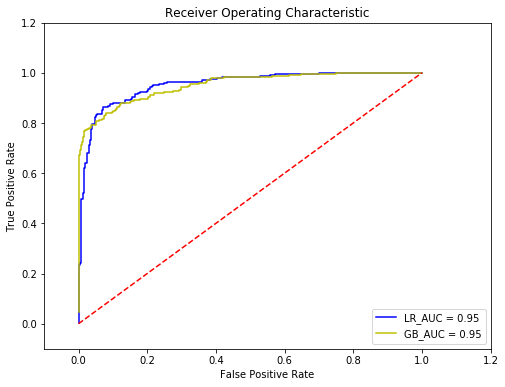

In [24]:
plt.figure(figsize=(8,6))
plt.title('Receiver Operating Characteristic')  
plt.plot(fpr_LR, tpr_LR, 'b',  label='LR_AUC = %0.2f'% roc_auc_LR) 
plt.plot(fpr_GB, tpr_GB, 'y',  label='GB_AUC = %0.2f'% roc_auc_GB) 
plt.legend(loc='lower right')  
plt.plot([0,1],[0,1],'r--')  
plt.xlim([-0.1,1.2])  
plt.ylim([-0.1,1.2])  
plt.ylabel('True Positive Rate')  
plt.xlabel('False Positive Rate')  
plt.show() 

In [25]:
sent='房间较为简单,非常干净.'
sent_cut=jieba.lcut(sent)

In [27]:
sent_cut_input=' '.join(sent_cut)

In [28]:
sent_cut_input

'房间 较为简单 , 非常 干净 .'

In [34]:
Xpredict=vectorizer.transform([sent_cut_input]).todense()

In [35]:
GB.predict_proba(Xpredict)

array([[  6.70677556e-06,   9.99993293e-01]])

In [36]:
GB.predict(Xpredict)

array([1])

In [ ]:
正面评论